# Pymaceuticals Inc.
---

### Analysis

In a recent study by Pymaceuticals, on cancer treatment drugs, especially focusing on Capomulin compared to other treatments, an analysis of 249 mice showed significant results. The average tumor size shows that Capomulin (40.68 mm³) might be better at controlling the growth of squamous cell carcinoma than other drugs like Ceftamin (52.59 mm³), Infubinol (52.88 mm³), and Ketapril (55.24 mm³), which had higher average tumor sizes. The numbers for variance and standard deviation also show that Capomulin is consistent and reliable, with lower variance (24.95) and standard deviation (4.99) compared to others, suggesting less change in tumor size among the mice treated.

Moreover, a detailed look at potential outliers in tumor sizes at the last timepoint showed that Infubinol might have unpredictable effects, with one case being very different from the usual, indicating varied responses among the subjects. In contrast, Capomulin and other drugs like Ramicane and Ceftamin had no such outliers, highlighting their consistency and predictability in treatment results. The study had nearly equal numbers of male and female mice, with 49.3% females, making sure both sexes were well represented in the results. This information is very important for Pymaceuticals to consider focusing more on Capomulin in their future drug development and marketing, given its good results in the study. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_mice = len(merge_df['Mouse ID'].unique())
print(number_mice)


249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_df.loc[merge_df['Mouse ID'] == duplicate_mice[0]]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print(clean_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [11]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_df['Mouse ID'].unique())
print(number_mice)

249


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tm = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tm = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tm = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd_tm = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tm = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame ({'Mean Tumor Volume' : mean_tm , 'Median Tumor Volume' : median_tm , 'Tumor Volume Variance' : variance_tm , 'Tumor Volume Std. Dev.': sd_tm , 'Tumor Volume Std. Err.' : sem_tm})
summary_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean' , 'median' , 'var', 'std', 'sem'])

summary_stats.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

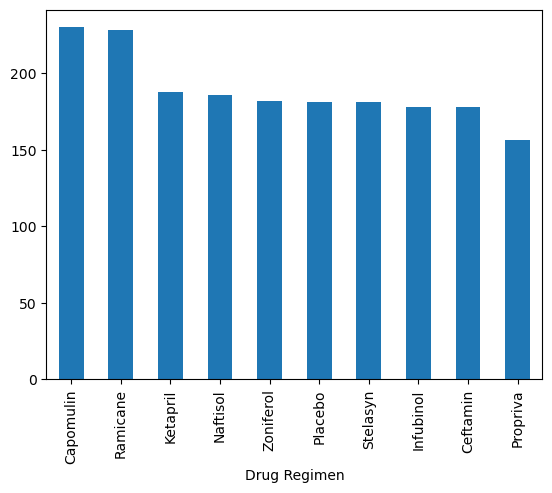

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regumen_value_counts = clean_df['Drug Regimen'].value_counts()
regumen_value_counts.plot(kind='bar')


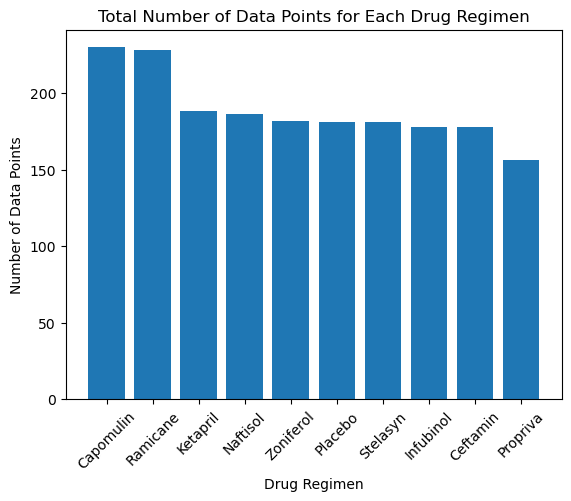

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Total Number of Data Points for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()


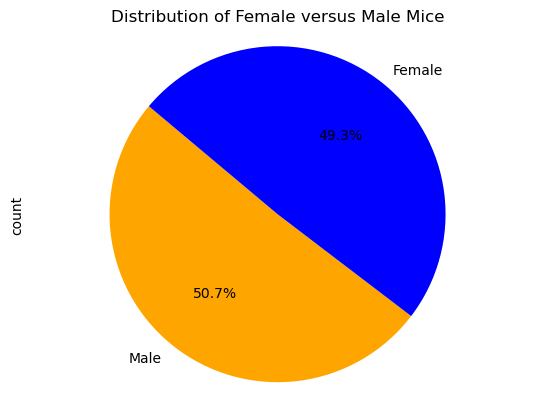

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = clean_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'blue'])
plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')
plt.show()


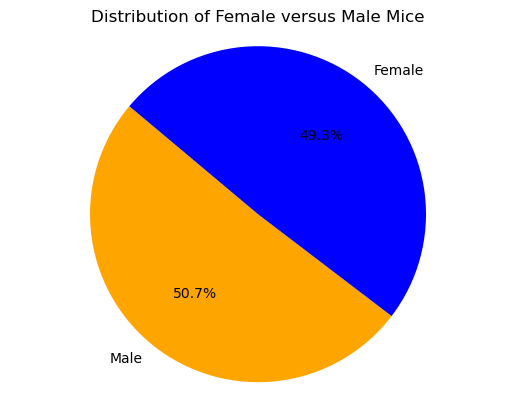

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = clean_df['Sex'].value_counts()
labels = gender_distribution.index
sizes = gender_distribution.values
colors = ['orange', 'blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female versus Male Mice')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin' , 'Ramicane' , 'Infubinol' , 'Ceftamin']
final_tumor_volumes = clean_df.loc[clean_df['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = final_tumor_volumes.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(final_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
print(final_tumor_volume_data.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    
    # add subset 
    tumor_vol_data.append(tumor_volumes)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)

    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Potential outliers for {treatment}: {potential_outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_vol = []
ramicane_vol = []
infubinol_vol = []
ceftamin_vol = []

for index, row in final_tumor_volume_data.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin_vol.append(row['Tumor Volume (mm3)'])




## Line and Scatter Plots

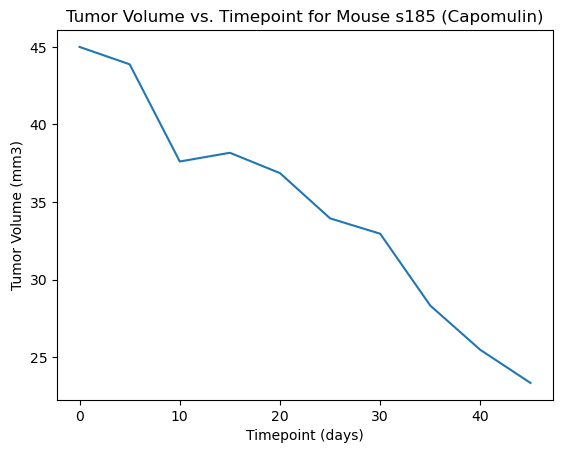

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_df["Mouse ID"].unique()[0]
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Generate the line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

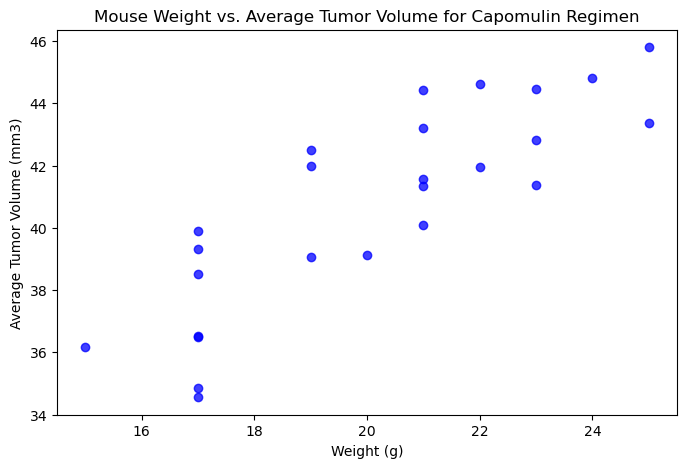

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
average_tumor_vol.reset_index(inplace=True)
plt.figure(figsize=(8, 5))
plt.scatter(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


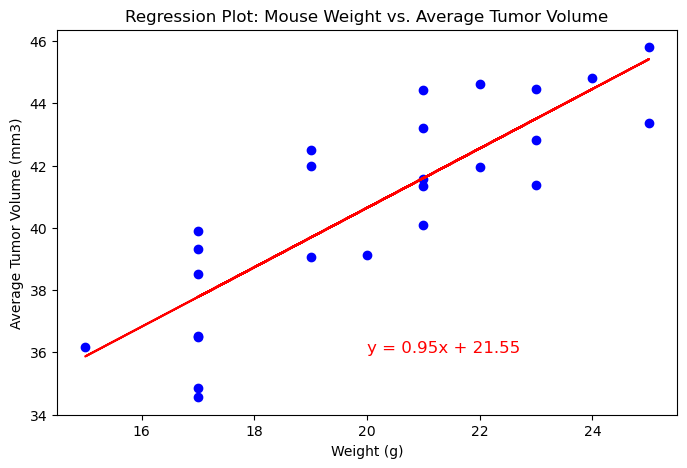

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
correlation = st.pearsonr(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])

regression_line = slope * average_tumor_vol['Weight (g)'] + intercept

plt.figure(figsize=(8,5))
plt.scatter(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'], color='blue')
plt.plot(average_tumor_vol['Weight (g)'], regression_line, color='red')

plt.title('Regression Plot: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (20, 36), fontsize=12, color='red')

plt.show()
